In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold

from __future__ import absolute_import, division, print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import random
from tensorflow.keras import Model, layers

In [2]:
# df = pd.read_csv("test_classification_data_with_date.csv", index_col = False)
df = pd.read_csv("test_classification_data.csv", index_col = False)
# df = df.drop(df[(df.Class == 'H')].index).drop('date', axis = 1)
df = df.drop('date', axis = 1)
X = df.drop('Class', axis = 1)
Y = df['Class']

kf = KFold(n_splits = 3)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

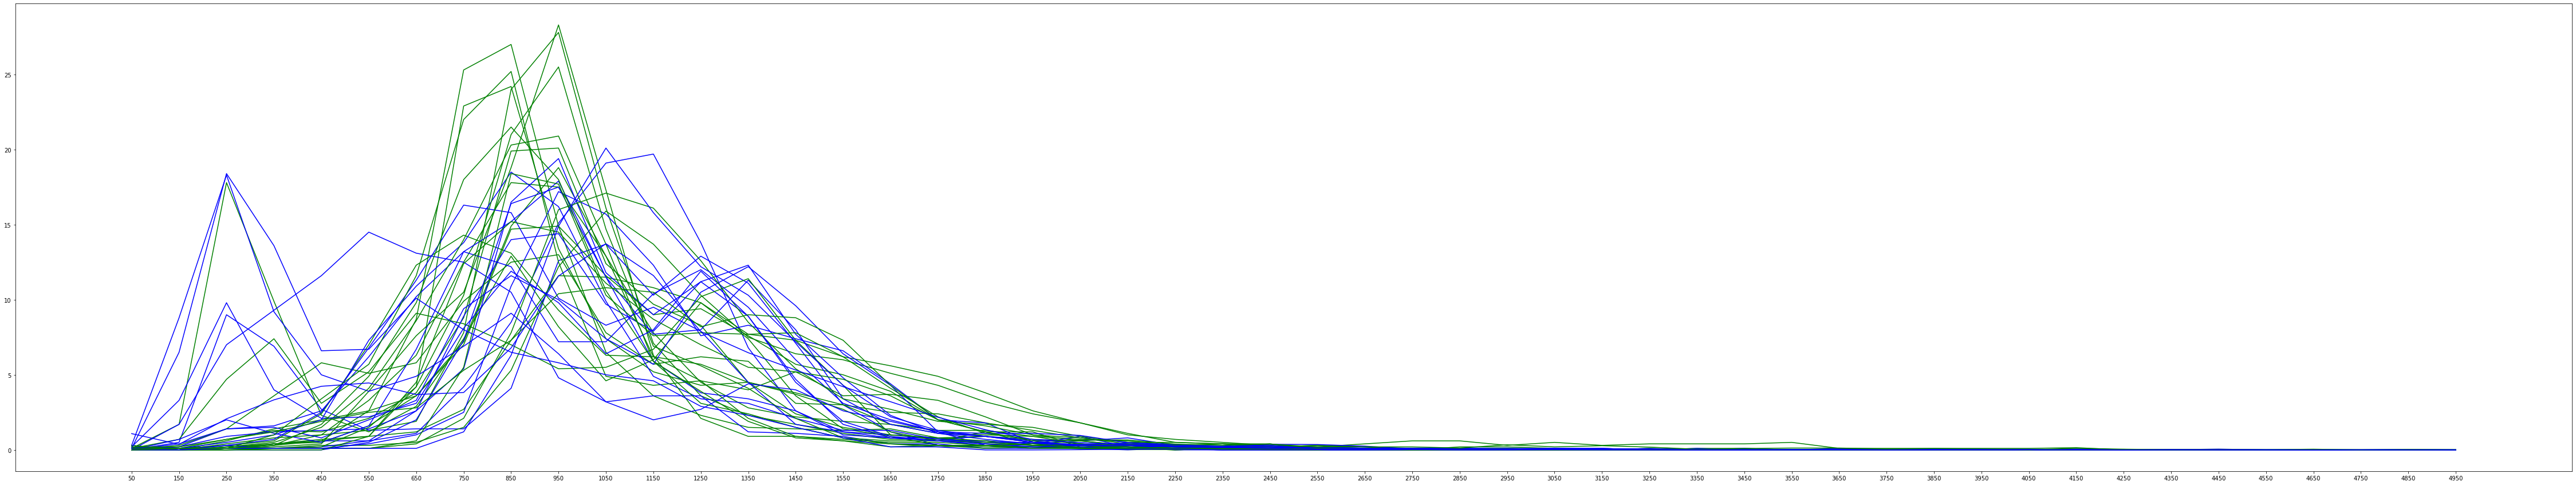

In [3]:
# plot histograms
plt.figure(figsize=(80,15))
for i in range (X.shape[0]):
    if Y.iloc[i] == 2:
        plt.plot(X.iloc[i], color = 'r')
    if Y.iloc[i] == 1:
        plt.plot(X.iloc[i], color = 'b')
    if Y.iloc[i] == 0:
        plt.plot(X.iloc[i], color = 'g')

In [ ]:
for i in range (0, 15):
    print("kernel: poly, degree: ", i)
    train_acc = 0
    test_acc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        SVClassifier = SVC(kernel = 'poly', degree = i)
        SVClassifier.fit(X_train, Y_train)

        y_train_pred = SVClassifier.predict(X_train)
        y_test_pred = SVClassifier.predict(X_test)

    #     print(confusion_matrix(y_train_pred, Y_train))
    #     print(classification_report(y_train_pred, Y_train))
    #     print(confusion_matrix(y_test_pred, Y_test))
        train_acc += accuracy_score(y_train_pred, Y_train)
        test_acc += accuracy_score(y_test_pred, Y_test)
    print("average training accuracy: ", train_acc / 5)
    print("average testing accuracy: ", test_acc / 5)
    print()

print("kernel: linear")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    SVClassifier = SVC(kernel = 'linear')
    SVClassifier.fit(X_train, Y_train)

    y_train_pred = SVClassifier.predict(X_train)
    y_test_pred = SVClassifier.predict(X_test)

    train_acc += accuracy_score(y_train_pred, Y_train)
    test_acc += accuracy_score(y_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

print("kernel: rbf")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    SVClassifier = SVC()
    SVClassifier.fit(X_train, Y_train)

    y_train_pred = SVClassifier.predict(X_train)
    y_test_pred = SVClassifier.predict(X_test)

    train_acc += accuracy_score(y_train_pred, Y_train)
    test_acc += accuracy_score(y_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

print("kernel: sigmoid")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    SVClassifier = SVC(kernel = 'sigmoid')
    SVClassifier.fit(X_train, Y_train)

    y_train_pred = SVClassifier.predict(X_train)
    y_test_pred = SVClassifier.predict(X_test)

    train_acc += accuracy_score(y_train_pred, Y_train)
    test_acc += accuracy_score(y_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Logistic Regression")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    logreg_clf = LogisticRegression()
    logreg_clf.fit(X_train, Y_train)
    logreg_train_pred = logreg_clf.predict(X_train)
    logreg_test_pred = logreg_clf.predict(X_test)

    train_acc += accuracy_score(logreg_train_pred, Y_train)
    test_acc += accuracy_score(logreg_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Decision Tree")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(X_train, Y_train)
    tree_train_pred = tree_clf.predict(X_train)
    tree_test_pred = tree_clf.predict(X_test)

    train_acc += accuracy_score(tree_train_pred, Y_train)
    test_acc += accuracy_score(tree_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("K Nearest Neighbor")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, Y_train)
    knn_train_pred = knn_clf.predict(X_train)
    knn_test_pred = knn_clf.predict(X_test)

    train_acc += accuracy_score(knn_train_pred, Y_train)
    test_acc += accuracy_score(knn_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Linear Discriminant Analysis")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(X_train, Y_train)
    lda_train_pred = lda_clf.predict(X_train)
    lda_test_pred = lda_clf.predict(X_test)

    train_acc += accuracy_score(lda_train_pred, Y_train)
    test_acc += accuracy_score(lda_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Gaussian Naive Bayes")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    gnb_clf = GaussianNB()
    gnb_clf.fit(X_train, Y_train)
    gnb_train_pred = gnb_clf.predict(X_train)
    gnb_test_pred = gnb_clf.predict(X_test)

    train_acc += accuracy_score(gnb_train_pred, Y_train)
    test_acc += accuracy_score(gnb_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Random Forest - gini")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, Y_train)
    rf_train_pred = rf_clf.predict(X_train)
    rf_test_pred = rf_clf.predict(X_test)

    train_acc += accuracy_score(rf_train_pred, Y_train)
    test_acc += accuracy_score(rf_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
print("Random Forest - entropy")
train_acc = 0
test_acc = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf2_clf = RandomForestClassifier(criterion = 'entropy')
    rf2_clf.fit(X_train, Y_train)
    rf2_train_pred = rf2_clf.predict(X_train)
    rf2_test_pred = rf2_clf.predict(X_test)

    train_acc += accuracy_score(rf2_train_pred, Y_train)
    test_acc += accuracy_score(rf2_test_pred, Y_test)
print("average training accuracy: ", train_acc / 5)
print("average testing accuracy: ", test_acc / 5)
print()

In [ ]:
# Logistic Regression

# MNIST dataset parameters
num_classes = 2
num_features = 50

# Training parameters
learning_rate = 0.01
training_steps = 20000
batch_size = 256
display_steps = 250

# load dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# logistic regression (Wx + b)
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    # ****************
    # softmax is a generalization of sigmoid function
    # sigmoid function is specifiically for binary classification
    # ****************
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy_LogReg(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

# Accuracy metric.
def accuracy_LogReg(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

def run_optimization_LogReg(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy_LogReg(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_LogReg(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy_LogReg(pred, batch_y)
        acc = accuracy_LogReg(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy_LogReg(pred, y_test))

# # Predict 5 images from validation set.
# n_images = 5
# test_images = random.choices(x_test, k = n_images)
# predictions = logistic_regression(test_images)

# # Display image and model prediction.
# for i in range(n_images):
# #     plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
# #     plt.show()
#     print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

In [7]:
# Neural Network

# MNIST dataset parameters
num_classes = 2
num_features = 50

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# Network parameters
n_hidden_1 = 256
n_hidden_2 = 128

# load dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
# x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# # x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# # x_train, x_test = x_train/255, x_test/255

# # Use tf.data API to shuffle and batch data.
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Create NN model
class Neural_Network(Model):
    # Set layers
    def __init__(self):
        tf.keras.backend.clear_session()
        super(Neural_Network, self).__init__();
        # 1st fully connected hidden layer
        self.fc1 = layers.Dense(n_hidden_1, activation = tf.nn.relu)
        # 2nd fully connected hidden layer
        self.fc2 = layers.Dense(n_hidden_2, activation = tf.nn.relu)
        # Output layer
        self.out = layers.Dense(num_classes)
        
    # Set forward pass
    def call(self, x, is_training = False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build NN model
neural_network = Neural_Network()

# Cross-Entropy loss function.
def cross_entropy_NN(y_pred, y_true):
    # Convert labels to int64 for tf cross-entropy function
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    # Average loss across batch
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy_NN(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process
def run_optimization_NN(x, y):
    with tf.GradientTape() as g:
        pred = neural_network(x, is_training = True)
        loss = cross_entropy_NN(pred, y)
        
    trainable_variables = neural_network.trainable_variables
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
#     x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
#     x_train, x_test = x_train/255, x_test/255

    # Use tf.data API to shuffle and batch data.
    train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)
    for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
        run_optimization_NN(batch_x, batch_y)

        if step % display_steps == 0 or step == 5:
            pred = neural_network(batch_x, is_training = True)
            loss = cross_entropy_NN(pred, batch_y)
            acc = accuracy_NN(pred, batch_y)
            print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
    # Test model on validation set.
    pred = neural_network(x_test, is_training = False)
    print("Test Accuracy: %f" % accuracy_NN(pred, y_test))

step: 5, loss: 0.784175, accuracy: 0.625000
step: 250, loss: 0.075977, accuracy: 1.000000
step: 500, loss: 0.025975, accuracy: 1.000000
step: 750, loss: 0.013356, accuracy: 1.000000
step: 1000, loss: 0.009196, accuracy: 1.000000
step: 1250, loss: 0.006428, accuracy: 1.000000
step: 1500, loss: 0.005051, accuracy: 1.000000
step: 1750, loss: 0.003810, accuracy: 1.000000
step: 2000, loss: 0.003334, accuracy: 1.000000
Test Accuracy: 0.769231
step: 5, loss: 0.065814, accuracy: 0.960938
step: 250, loss: 0.004413, accuracy: 1.000000
step: 500, loss: 0.002958, accuracy: 1.000000
step: 750, loss: 0.002147, accuracy: 1.000000
step: 1000, loss: 0.001552, accuracy: 1.000000
step: 1250, loss: 0.001713, accuracy: 1.000000
step: 1500, loss: 0.001179, accuracy: 1.000000
step: 1750, loss: 0.000985, accuracy: 1.000000
step: 2000, loss: 0.000855, accuracy: 1.000000
Test Accuracy: 0.692308
step: 5, loss: 1.592554, accuracy: 0.593750
step: 250, loss: 0.006552, accuracy: 1.000000
step: 500, loss: 0.004533, a

In [8]:
# print(x_train)
# print(x_test.shape)
# print(X)
# print(Y)
# print(y_train)
x = np.array(X, np.float32)
pred = neural_network(x, is_training = False)
print(accuracy_NN(pred, Y))

tf.Tensor(1.0, shape=(), dtype=float32)


In [14]:
T = pd.read_csv("test_data.csv", index_col = False)
T = T.drop('Date', axis = 1)
x_t = T.drop('Class', axis = 1)
x_t = np.array(x_t, np.float32)
y_t = T['Class']
pred = neural_network(x_t, is_training = False)
print(accuracy_NN(pred, y_t))
print(pred)

tf.Tensor(0.9285714, shape=(), dtype=float32)
tf.Tensor(
[[1.0000000e+00 9.1769161e-09]
 [9.9924797e-01 7.5200544e-04]
 [1.0000000e+00 2.4831050e-11]
 [1.0000000e+00 1.2341097e-08]
 [1.0000000e+00 5.6916601e-08]
 [9.9999928e-01 7.7428854e-07]
 [9.9999797e-01 2.0296154e-06]
 [9.9999487e-01 5.0663712e-06]
 [9.9961346e-01 3.8653036e-04]
 [3.9801882e-03 9.9601978e-01]
 [3.9227560e-01 6.0772437e-01]
 [7.9714311e-03 9.9202853e-01]
 [1.0000000e+00 1.5720708e-09]
 [1.0000000e+00 2.7164451e-09]], shape=(14, 2), dtype=float32)


In [ ]:
# tf.keras.models.save_model(neural_network, "test_NN_1.0.h5")
neural_network.save('test_NN_1.0')

In [ ]:
new_model = tf.keras.models.load_model('test_NN_1.0')

In [ ]:
new_model.summary()
print(new_model.trainable_variables)

In [ ]:
x = np.array(X, np.float32)
pred = new_model(x, is_training = False)
print(accuracy_NN(pred, Y))
T = pd.read_csv("test_data.csv", index_col = False)
x_t = T.drop('Class', axis = 1)
x_t = np.array(x_t, np.float32)
y_t = T['Class']
pred = new_model(x_t, is_training = False)
print(accuracy_NN(pred, y_t))

In [ ]:
neural_network = tf.keras.models.load_model('test_NN_1.0')

In [4]:
dense_weight = np.asarray(neural_network.trainable_variables[0])
dense_bias = np.asarray(neural_network.trainable_variables[1])
dense1_weight = np.asarray(neural_network.trainable_variables[2])
dense1_bias = np.asarray(neural_network.trainable_variables[3])
dense2_weight = np.asarray(neural_network.trainable_variables[4])
dense2_bias = np.asarray(neural_network.trainable_variables[5])
# np.savetxt('trainable_variables/dense_weight_50x256.csv', np.transpose(dense_weight), delimiter=',')
# np.savetxt('trainable_variables/dense_bias_256.csv', np.transpose(dense_bias), delimiter=',')
# np.savetxt('trainable_variables/dense1_weight_256x128.csv', np.transpose(dense1_weight), delimiter=',')
# np.savetxt('trainable_variables/dense1_bias_128.csv', np.transpose(dense1_bias), delimiter=',')
# np.savetxt('trainable_variables/dense2_weight_128x2.csv', np.transpose(dense2_weight), delimiter=',')
# np.savetxt('trainable_variables/dense2_bias_2.csv', np.transpose(dense2_bias), delimiter=',')
np.savetxt('trainable_variables/dense_weight_50x256.csv', dense_weight, delimiter=',')
np.savetxt('trainable_variables/dense_bias_256.csv', dense_bias, delimiter=',')
np.savetxt('trainable_variables/dense1_weight_256x128.csv', dense1_weight, delimiter=',')
np.savetxt('trainable_variables/dense1_bias_128.csv', dense1_bias, delimiter=',')
np.savetxt('trainable_variables/dense2_weight_128x2.csv', dense2_weight, delimiter=',')
np.savetxt('trainable_variables/dense2_bias_2.csv', dense2_bias, delimiter=',')